In [14]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


In [15]:
df = pd.read_csv('/content/titanic.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [16]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [17]:
new_df = df[['Pclass', 'Sex', 'Age', 'Fare','Survived']].copy()
display(new_df.head())

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [18]:
new_df['Sex']=new_df['Sex'].map({'male':1,'female':0})
new_df.head(3)

,Pclass,Sex,Age,Fare,Survived
0,3,1,22.0,7.2500,0
1,1,0,38.0,71.2833,1
2,3,0,26.0,7.9250,1


In [19]:
new_df.isnull().sum()

,0
Pclass,0
Sex,0
Age,177
Fare,0
Survived,0


In [20]:
new_df['Age']=new_df['Age'].fillna(df['Age'].mode()[0])
new_df.head(3)

,Pclass,Sex,Age,Fare,Survived
0,3,1,22.0,7.2500,0
1,1,0,38.0,71.2833,1
2,3,0,26.0,7.9250,1


In [21]:
new_df.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
Fare,0
Survived,0


In [22]:
x=new_df.drop('Survived',axis="columns")
y=new_df['Survived']

In [23]:
display(x.head(2))
display(y.head(2))

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833


,Survived
0,0
1,1


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
model=DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [27]:
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7988826815642458


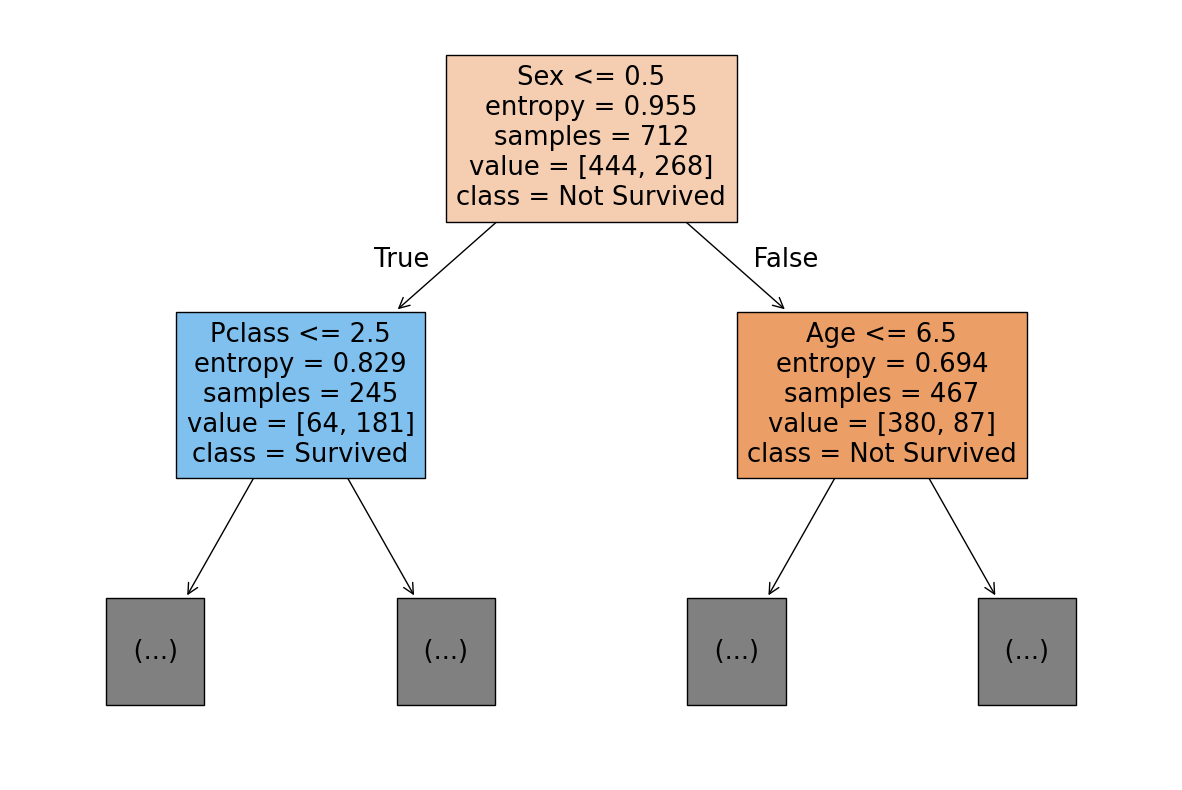

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plot_tree(model,filled=True, feature_names=x.columns, class_names=['Not Survived', 'Survived'], max_depth=1)
plt.show()

In [31]:
import joblib

# Save the model to a file
joblib.dump(model, 'decision_tree_model.joblib')

print("Model saved as decision_tree_model.joblib")

Model saved as decision_tree_model.joblib
